/Users/rd_bigdata01/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


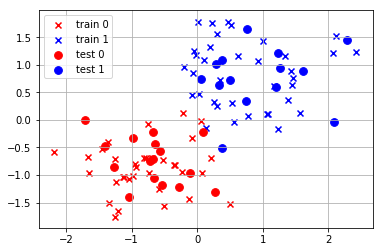

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
 
np.random.seed(seed=0)
X_0 = np.random.multivariate_normal( [2,2],  [[2,0],[0,2]],  50 )
y_0 = np.zeros(len(X_0))
 
X_1 = np.random.multivariate_normal( [6,7],  [[3,0],[0,3]],  50 )
y_1 = np.ones(len(X_1))
 
X = np.vstack((X_0, X_1))
y = np.append(y_0, y_1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
 
# 特徴データを標準化(平均 0、標準偏差 1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
 
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

plt.grid()
plt.legend(loc='upper left')

In [2]:
from sklearn.linear_model import LogisticRegression

# 訓練
lr = LogisticRegression()
lr.fit(X_train_std, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [3]:
# テストデータ 30個を分類
print (lr.predict(X_test_std))

# 精度を確認
print (lr.score(X_test_std, y_test))

[0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]
0.9666666666666667


# ロジスティック回帰で、乱数データを分類する
http://ailaby.com/logistic_reg/

In [4]:
print (lr.intercept_)
print (lr.coef_)

w_0 = lr.intercept_[0] # 重み w0
w_1 = lr.coef_[0,0]    # 重み w1
w_2 = lr.coef_[0,1]    # 重み w2


[0.13310259]
[[1.82092295 2.26785197]]


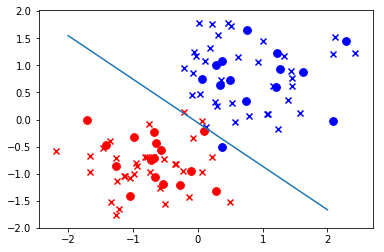

In [5]:


# 境界線の式
#   w_1・x + w_2・y + w_0 = 0
#   ⇒ y = (-w_1・x - w_0) / w_2
 
# 境界線 プロット
plt.plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

# データを重ねる
plt.scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
plt.scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
plt.scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
plt.scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')


# パラメータC(正則化項の係数)を変化させて比較する

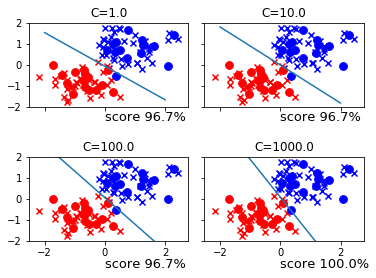

In [6]:
plt.figure(figsize=(12, 12))

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)
plt.ylim([-2, 2])
plt.subplots_adjust(wspace=0.1, hspace=0.6)
c_params = [1.0, 10.0, 100.0, 1000.0]
for i, c in enumerate(c_params):
    lr = LogisticRegression(C=c)
    lr.fit(X_train_std, y_train)

    w_0 = lr.intercept_[0]
    w_1 = lr.coef_[0,0]
    w_2 = lr.coef_[0,1]
    score = lr.score(X_test_std, y_test)
    
    axs[int(i/2), i%2].set_title('C=' + str(c))
    axs[int(i/2), i%2].plot([-2,2], list(map(lambda x: (-w_1 * x - w_0)/w_2, [-2,2])))

    axs[int(i/2), i%2].scatter(X_train_std[y_train==0, 0], X_train_std[y_train==0, 1], c='red', marker='x', label='train 0')
    axs[int(i/2), i%2].scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='blue', marker='x', label='train 1')
    axs[int(i/2), i%2].scatter(X_test_std[y_test==0, 0], X_test_std[y_test==0, 1], c='red', marker='o', s=60, label='test 0')
    axs[int(i/2), i%2].scatter(X_test_std[y_test==1, 0], X_test_std[y_test==1, 1], c='blue', marker='o', s=60, label='test 1')

    if (i < 2):
        axs[int(i/2), i%2].text(0,-2.7, 'score ' + str(round(score,3)*100) + '%', size=13)
    else:
        axs[int(i/2), i%2].text(0,-3.3, 'score ' + str(round(score,3)*100) + '%', size=13)
